## Coding Exercise #0301

### 1. Linear regression with 'Galton' data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
%matplotlib inline

#### 1.1. Read in data and visualize:

In [2]:
# Go to the directory where the data file is located. 
# os.chdir(r'~~')                # Please, replace the path with your own.   

In [3]:
df = pd.read_csv('data_galton.csv', header='infer')

In [4]:
df.head()

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0


In [5]:
# There are many repeated values.
# So, we summarize as a cross table.
myTable = pd.crosstab(df.parent,df.child)
myTable

child,61.7,62.2,63.2,64.2,65.2,66.2,67.2,68.2,69.2,70.2,71.2,72.2,73.2,73.7
parent,,,,,,,,,,,,,,
64.0,1,0,2,4,1,2,2,1,1,0,0,0,0,0
64.5,1,1,4,4,1,5,5,0,2,0,0,0,0,0
65.5,1,0,9,5,7,11,11,7,7,5,2,1,0,0
66.5,0,3,3,5,2,17,17,14,13,4,0,0,0,0
67.5,0,3,5,14,15,36,38,28,38,19,11,4,0,0
68.5,1,0,7,11,16,25,31,34,48,21,18,4,3,0
69.5,0,0,1,16,4,17,27,20,33,25,20,11,4,5
70.5,1,0,1,0,1,1,3,12,18,14,7,4,3,3
71.5,0,0,0,0,1,3,4,3,5,10,4,9,2,2


In [6]:
# Transform the cross table so that it could be displyed as a Scatter plot. 
# Size of point = Frequency.
nrows = myTable.shape[0]
ncols = myTable.shape[1]
childHeights = list(myTable.columns)
parentHeights = list(myTable.index)
combo = [ (x,y,myTable.loc[x,y]) for x in parentHeights for y in childHeights]
combo = pd.DataFrame(combo, columns = ['x','y','freq'])

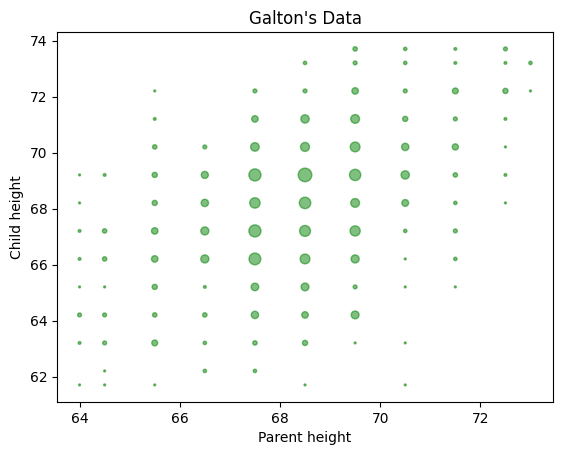

In [7]:
# Show the Scatter plot.
plt.scatter(combo.x, combo.y, s=combo.freq*2, c='green',alpha=0.5)
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Data")
plt.show()

#### 1.2. Linear regression training:

In [8]:
# Instantiate a linear regression object.
lm = LinearRegression(fit_intercept=True)

In [9]:
# Train.
lm.fit(df[['parent']],df[['child']])

LinearRegression()

In [10]:
# Show the intercept.
lm.intercept_

array([23.94153018])

In [11]:
# Show the slope.
lm.coef_

array([[0.64629058]])

#### 1.3. Visualization of the regression line:

In [12]:
# Predicted Y.
predY = lm.predict(df[['parent']])

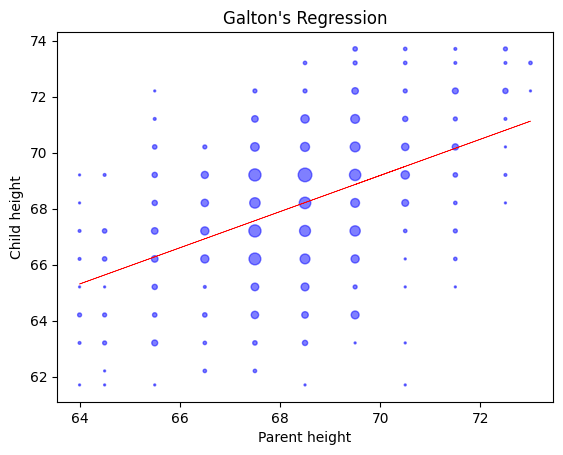

In [13]:
# Show the Scatter plot + Regression line.
plt.plot(df.parent.values,predY,c = 'red',linestyle='-',linewidth=0.5)
plt.scatter(combo.x, combo.y, s=combo.freq*2, c='blue',alpha=0.5)
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Regression")
plt.show()